In [26]:
import pandas as pd

# current version of seaborn generates a bunch of warnings that we'll ignore
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(style="white", color_codes = True)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel("ERROR")

# Iris Dataset 불러오기

In [2]:
iris = pd.read_csv("../실습/Iris.csv") #dataframe
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]
X.sample(5)
y.sample(5)

82     Iris-versicolor
137     Iris-virginica
120     Iris-virginica
42         Iris-setosa
141     Iris-virginica
Name: Species, dtype: object

# Data Scalling

In [4]:
X.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,-1.720542,-0.900681,1.032057,-1.341272
1,-1.697448,-1.143017,-0.124958,-1.341272
2,-1.674353,-1.385353,0.337848,-1.398138
3,-1.651258,-1.506521,0.106445,-1.284407
4,-1.628164,-1.021849,1.263460,-1.341272


# K-Means Clustering on Iris Dataset

빠르다는 장점이 있지만, cluster의 갯수를 정해줘야 한다는 단점이 있다.

In [6]:
from sklearn.cluster import KMeans

nclusters = 3
seed=0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

Clustering 결과 확인하기 (정답이 없을 때) : Silhoutte scoring 방법

In [7]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.42560414986156675

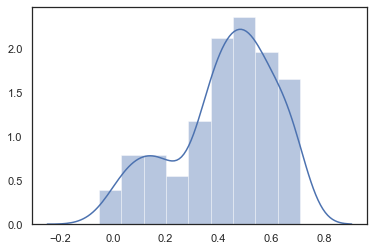

In [8]:
# note that this si the mean over all the samples - there might be some clusters that are well separated and tohers that are closer together.
# so let's look at the distribution of silhouette scores.

scores= metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
#scores.shape # shape = [150,]
sns.distplot(scores) #distribution plotting (histogram + kdeplot)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C2DE60208>,
      dtype=object)

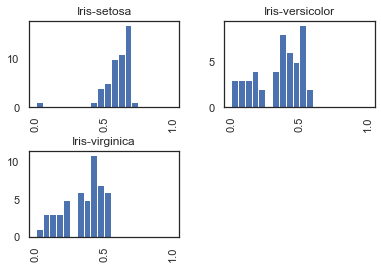

In [9]:
# cna we add the species info to that plot?
# well, can plot them separately using pandas -
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = iris['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20)

Clustering 결과 확인하기(정답이 있을 때)

In [10]:
from sklearn.metrics.cluster import adjusted_rand_score

#first, let's see how the k-means clustering did-
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.694647633734363

# Principle Component Analysis 수행 

In [12]:
# mash the data down into 2 dimensions
from sklearn.decomposition import PCA
ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1', 'PC2']) #PC = principal component
X_pca.sample(5)
#len(X_pca)

,PC1,PC2
68,0.957579,-1.579911
15,-2.500478,2.648892
12,-2.202148,-0.745410
83,0.889714,-0.609846
31,-1.816734,0.405682


# PCA와 K-Means 데이터 연결

In [13]:
y_id_array = pd.Categorical(iris['Species']).codes
y_id_array 

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans # <-- prediction (k-means의 예측 카테고리)
df_plot['SpeciesId'] = y_id_array # <-- referece (정답 카테고리)
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
76,1.135535,-0.005011,0,1
27,-2.060058,0.512194,1,0
96,0.434475,-0.374715,2,1
115,1.282277,0.654997,0,2
45,-1.780557,-0.738535,1,0


In [19]:
# 시각화
def plotData(df, groupby):
    
    #make a figure with just one subplot.
    #you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))
    
    #color map
    cmap = mpl.cm.get_cmap('prism')
    
    #we can use pandas to plot each cluster on the same graph.
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, #need to pass this so all scatterplots are on same graph
                     kind = 'scatter', x = 'PC1', y = 'PC2', 
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), s=30)
        ax.grid()
        ax.axhline(0, color='black')
        ax.axvline(0, color='black')
        ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

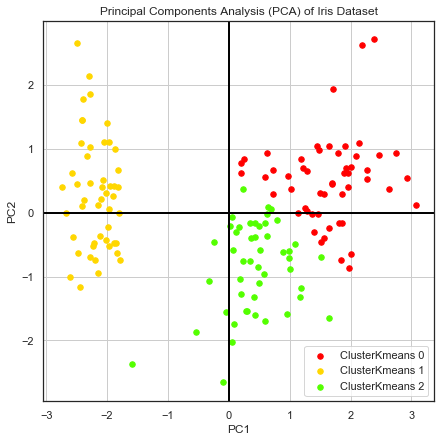

In [20]:
# K-Means 가 부여한 cluster 정보를 기준으로 시각화
plotData(df_plot, 'ClusterKmeans')

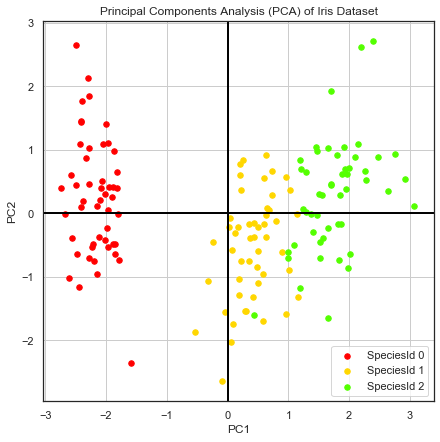

In [21]:
# 실제 정답 cluster 정보 기준으로 시각화
plotData(df_plot, 'SpeciesId')

위에서 보다시피 k-means는 제대로 된 정답을 찾아내지 못한다.
그러나 위의 2D 그림만을 너무 믿어서도 안된다. 위 그림은 PC1을 x축, PC2를 y축으로 삼아 그린 그림일 뿐이다.
PC1, PC2는 각각 데이터에서 '중복성'을 없애는 가장 좋은 axis를 찾아 낸 것이고 그 외의다른 모든 axis는 '강제로' 버려진 것이다.

In [22]:
# [참고]

# Gaussian Mixture Model

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

#predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

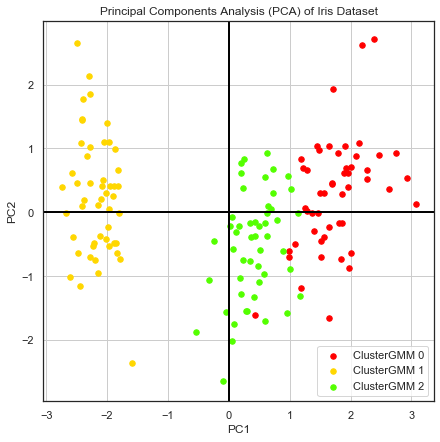

In [23]:
# add the CMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [24]:
# K-means vs. GMM

from sklearn.metrics.cluster import adjusted_rand_score

#first, let's see how the k-means clustering did-
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.694647633734363

In [25]:
#now the GMM clustering -
score = adjusted_rand_score(y, y_cluster_gmm)
score

1.0